In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
df = pd.read_csv('sales.csv')
df.head() #df.plot()

,sales
0,141
1,157
2,185
3,199
4,203


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

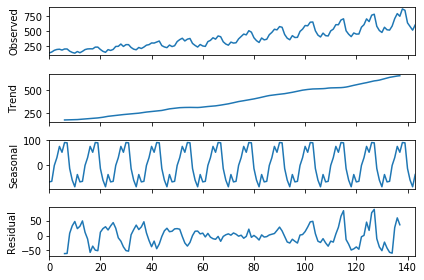

In [27]:
s = seasonal_decompose(df['sales'], freq=12).plot()

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [161]:
ar = ARIMA(df.sales, order=(2,1,2)).fit()

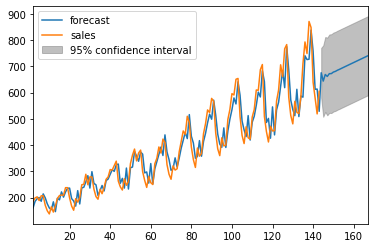

In [162]:
plot = ar.plot_predict(end=167)

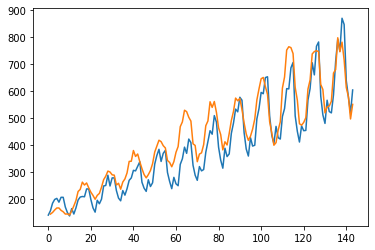

In [124]:
plt.plot(df.sales)
plt.plot(ar.fittedvalues.cumsum()+141)

In [91]:
#pd.concat([ar.fittedvalues, ar.fittedvalues.cumsum()+141],1)

In [126]:
ar.forecast()

(array([602.7687266]),
 array([35.57516998]),
 array([[533.0426747 , 672.49477849]]))

In [163]:
from statsmodels.tsa.statespace import sarimax

In [173]:
mod = sarimax.SARIMAX(df.sales, order=(3,1,1), 
                      seasonal_order=(3,1,1,12)).fit()

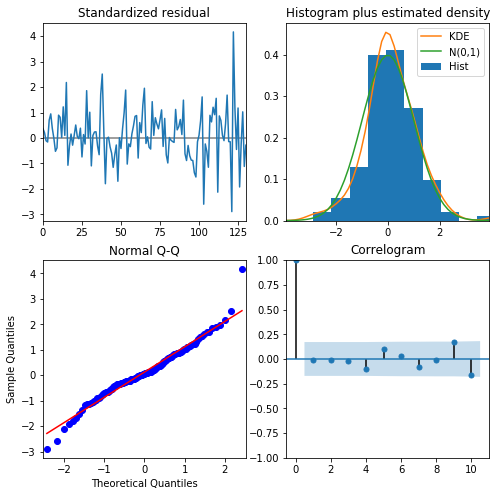

In [174]:
a = mod.plot_diagnostics(figsize=(8,8))

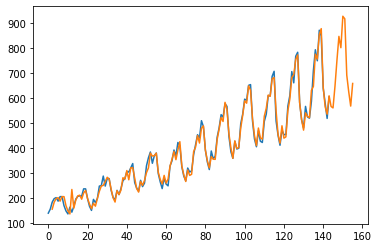

In [184]:
plt.plot(df.sales)
plt.plot(mod.predict(start =2, end=155))

In [198]:
mod.forecast(steps=12)

144    566.816328
145    560.875037
146    647.472239
147    751.106882
148    846.367467
149    801.225018
150    926.726799
151    916.359314
152    691.561599
153    625.202236
154    568.295762
155    658.489749
dtype: float64

In [197]:
mod.get_forecast(steps=12).conf_int()

,lower sales,upper sales
144,536.981425,596.651230
145,527.059829,594.690245
146,609.775226,685.169251
147,710.747391,791.466374
148,803.974283,888.760651
149,757.257141,845.192895
150,881.516213,971.937384
151,870.151481,962.567146
152,644.541608,738.581591
153,577.511431,672.893041


In [192]:
#mod.predict(start=0, end=155).to_excel('forecast.xlsx')
mod#.conf_int()

,0,1
ar.L1,0.335448,0.695596
ar.L2,0.020631,0.509131
ar.L3,-0.167694,0.237568
ma.L1,-1.135701,-0.832708
ar.S.L12,0.224519,1.049780
ar.S.L24,0.060403,0.510587
ar.S.L36,-0.187492,0.330090
ma.S.L12,-2.147976,0.275040
sigma2,41.911327,404.229711
